### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',500)

In [3]:
df=pd.read_csv(r"E:\Purvang\Data Set\used_cars.csv")

In [4]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
df.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"
4008,BMW,X3 xDrive30i,2020,"43,000 mi.",Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000"


In [6]:
df.shape

(4009, 12)

### Data Preprocessing 

In [7]:
df.describe(include='all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [9]:
import re
pattern=r'[^\w\s]'
df['price']=df['price'].replace(pattern,'',regex=True)

In [10]:
char=[',','mi.']
for i in char:
    df['milage']=df['milage'].replace(i,'',regex=True)
    
df['milage']=df['milage'].astype('int')

In [11]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [12]:
df['milage']=df['milage'].astype('int')
df['price']=df['price'].astype('int')
df['model_year']=df['model_year'].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   object
 3   milage        4009 non-null   int32 
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   int32 
dtypes: int32(2), object(10)
memory usage: 344.6+ KB


In [14]:
df.isnull().sum()/df.shape[0]

brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       0.042405
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        0.028187
clean_title     0.148666
price           0.000000
dtype: float64

In [15]:
for i in df.columns:
    df[i]=df[i].replace('–',None)

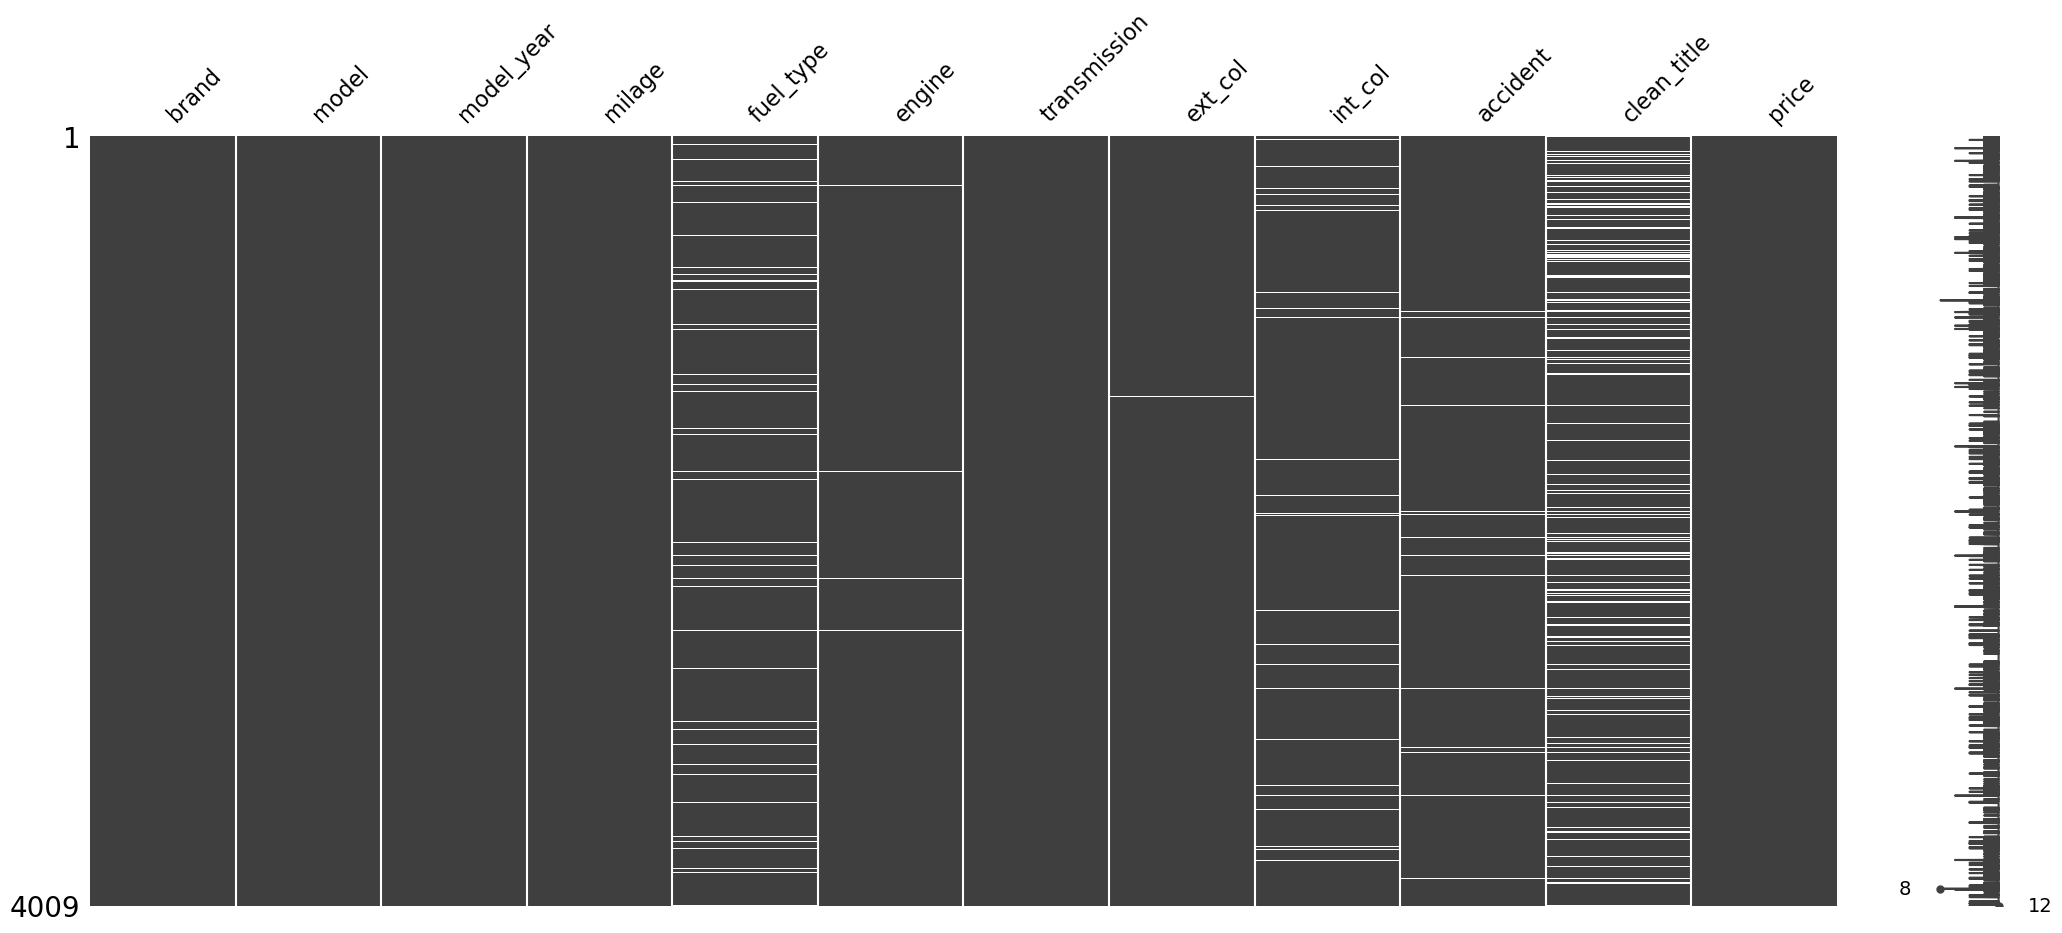

In [16]:
msno.matrix(df)
plt.show()

In [17]:
df['clean_title'].fillna(df['clean_title'].mode(),inplace=True)

In [18]:
df.dropna(how='any',inplace=True)

In [19]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [20]:
cat_df=df.select_dtypes(include='object')
num_df=df.select_dtypes(include='int')

In [21]:
cat_df.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes
6,Audi,S3 2.0T Premium Plus,2017,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes
7,BMW,740 iL,2001,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes


In [22]:
num_df.head()

,milage,price
0,51000,10300
1,34742,38005
3,88900,15500
6,84000,31000
7,242000,7300


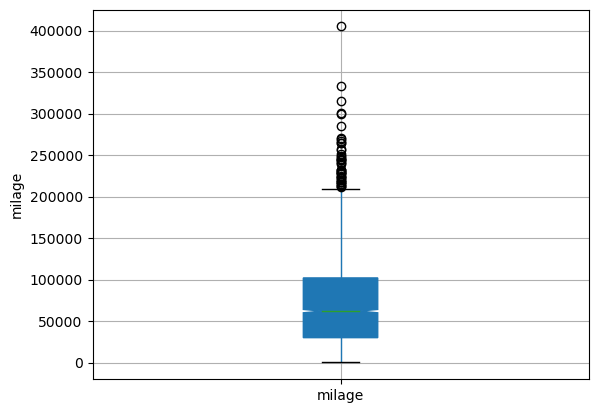

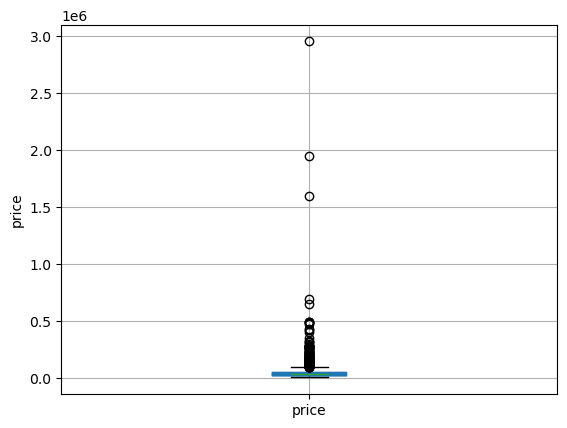

In [23]:
for col in num_df:
    num_df.boxplot(column=col,patch_artist=True,notch=True)
    plt.ylabel(col)
    plt.show()

#### Here from the boxplot we can see that outliers are present in milage and price column. To smooth these noisy data we will use the IQR(Inter Quartile Range) method, in which all the data points that lies outside of upper limit and lower limit wiil be removed from the dataset.

In [24]:
num_df.shape

(3127, 2)

In [25]:
percentile25=num_df['milage'].quantile(0.25)
percentile75=num_df['milage'].quantile(0.75)

In [26]:
percentile25

30000.0

In [27]:
percentile75

102000.0

In [28]:
iqr=percentile75-percentile25
iqr

72000.0

In [29]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [30]:
upper_limit

210000.0

In [31]:
lower_limit

-78000.0

In [32]:
upper_data_points=num_df[num_df['milage'] > upper_limit]
lower_data_points=num_df[num_df['milage'] < lower_limit]

In [33]:
upper_data_points.shape

(45, 2)

In [34]:
lower_data_points.shape

(0, 2)

In [35]:
#removing the outliers (The Data points that lies outside the IQR )

In [36]:
df=df[(df['milage'] < upper_limit) & (df['milage'] > lower_limit)]

In [37]:
df.shape

(3082, 12)

In [38]:
# remove outliers in price column also

In [39]:
percentile25=num_df['price'].quantile(0.25)
percentile75=num_df['price'].quantile(0.75)

In [40]:
percentile25

15575.0

In [41]:
percentile75

46900.0

In [42]:
iqr=percentile75-percentile25
iqr

31325.0

In [43]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [44]:
upper_limit

93887.5

In [45]:
lower_limit

-31412.5

In [46]:
upper_data_points=num_df[num_df['price'] > upper_limit]
lower_data_points=num_df[num_df['price'] < lower_limit]

In [47]:
upper_data_points.shape

(175, 2)

In [48]:
lower_data_points.shape

(0, 2)

In [49]:
df=df[(df['price'] < upper_limit) & (df['price'] > lower_limit)]

In [50]:
df.shape

(2907, 12)

In [51]:
#cheking the distribution of numeric features using distplot

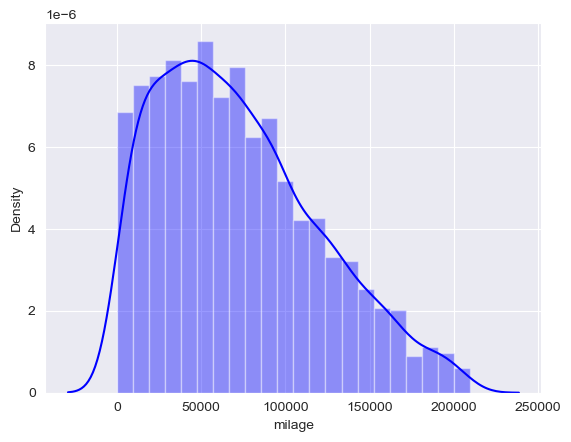

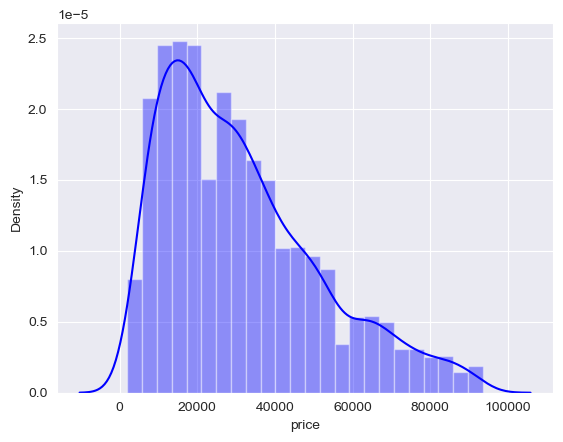

In [52]:
sns.set_style('darkgrid')
for col in num_df:
    sns.distplot(df[col],kde=True,color='blue')
    plt.show()

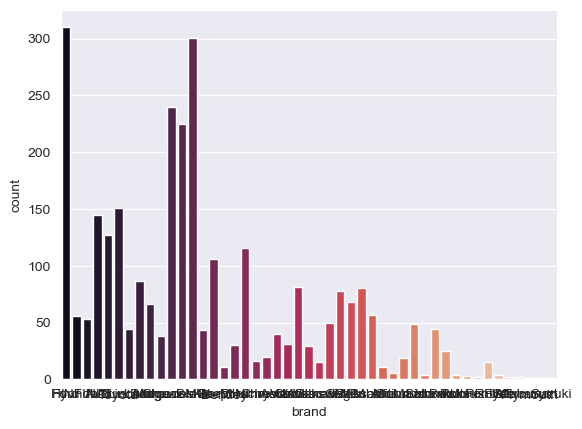

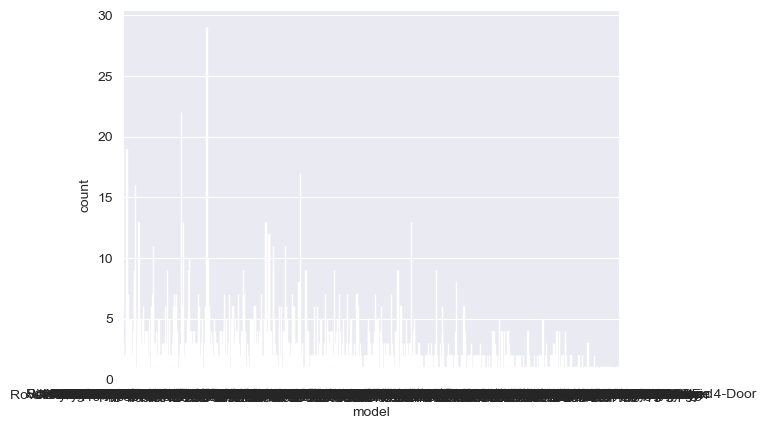

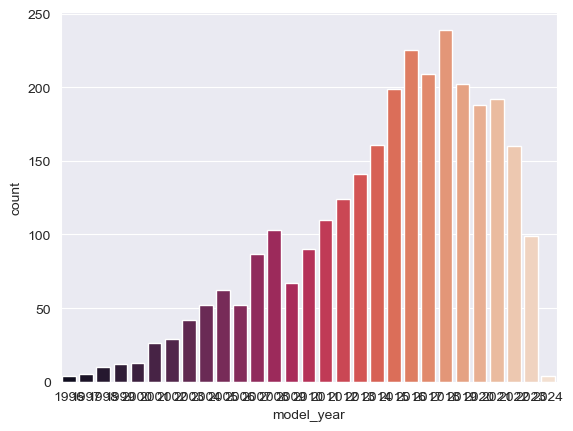

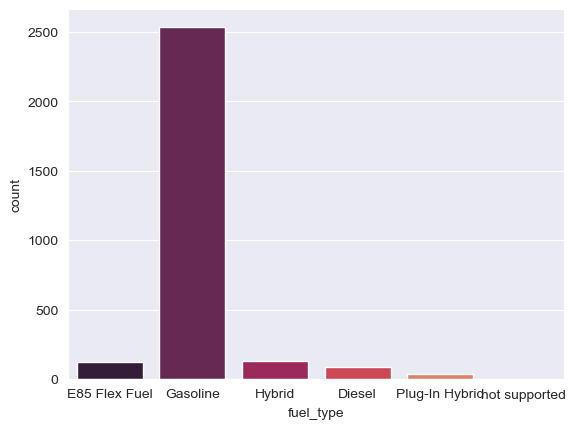

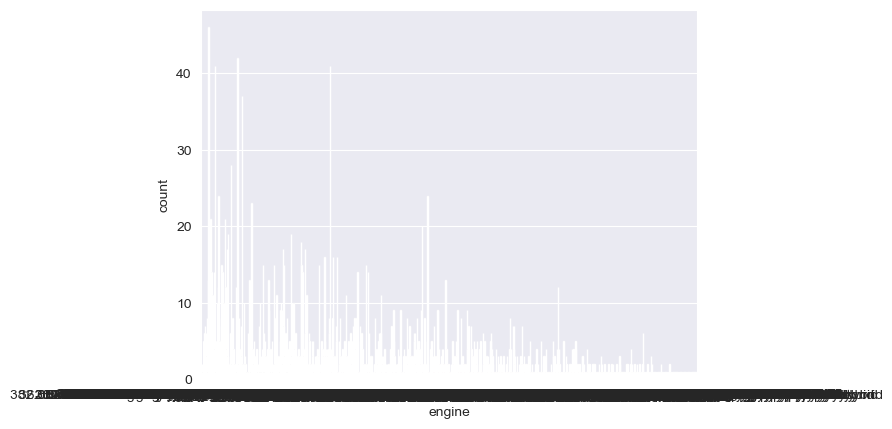

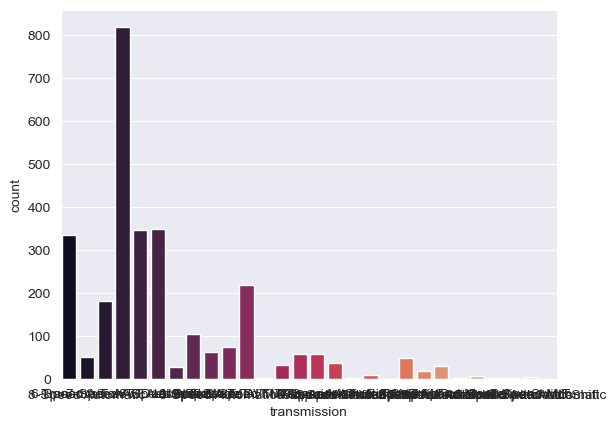

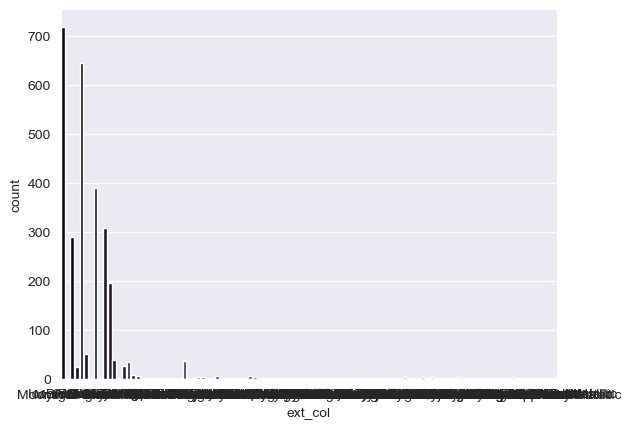

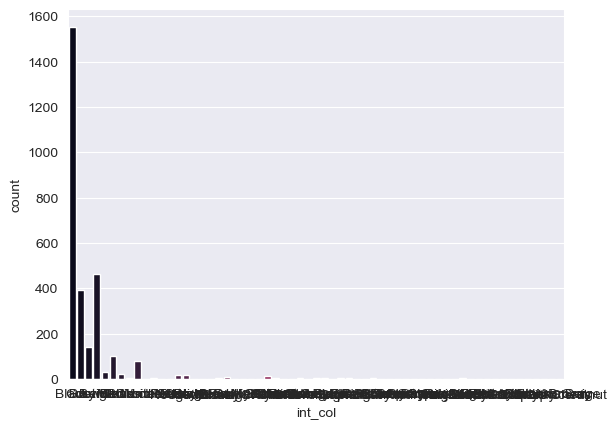

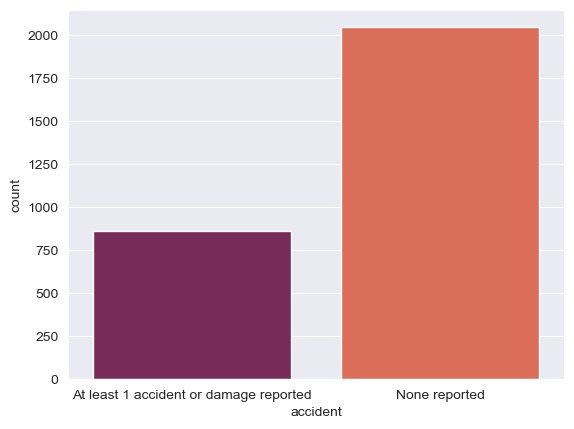

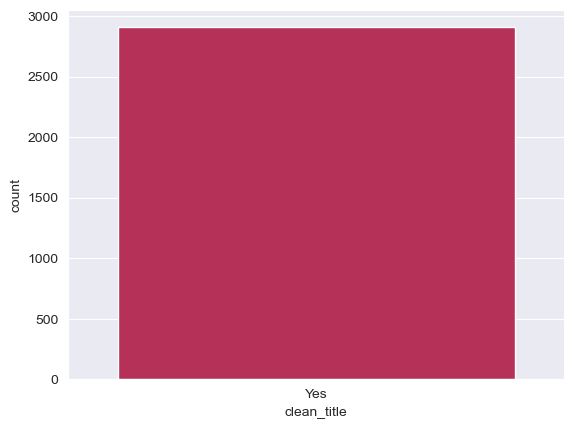

In [53]:
for col in cat_df:
    sns.countplot(x=df[col],palette='rocket')
    plt.show()

In [54]:
df.duplicated().value_counts()

False    2907
dtype: int64

In [55]:
# There is no duplicate value

In [56]:
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927
12,Toyota,Supra 3.0 Premium,2021,12500,Gasoline,382.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Yellow,Black,None reported,Yes,53500
13,Lincoln,Aviator Reserve AWD,2022,18196,Gasoline,400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Brown,None reported,Yes,62000
15,Land,Rover LR4 HSE,2013,79800,Gasoline,375.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,29990
17,Dodge,Challenger SXT,2013,61074,Gasoline,305.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,16800
19,Jaguar,F-TYPE R,2018,35250,Gasoline,550.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Black,None reported,Yes,68750


In [57]:
df.drop(columns=['ext_col','int_col'],inplace=True)

In [58]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,38005
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,15500
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,31000
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,41927


### Split the data into train and test 

In [59]:
x=df.drop(['price'],axis=1)
y=df['price']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50) 

### Transforming Categorical features into Numeric 

In [61]:
import category_encoders as ce

In [62]:
encoder=ce.TargetEncoder(cols=['brand', 'model','model_year','fuel_type','engine','transmission'])
lenc=encoder.fit(x_train,y_train)

In [63]:
x_train=lenc.transform(x_train)
x_test=lenc.transform(x_test)

In [64]:
x_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title
3620,46929.065791,39458.665129,16570.787620,50500,30660.327909,35963.282054,28965.115616,None reported,Yes
1815,24804.625392,31547.066003,44862.276417,32500,30660.327909,30453.834367,25667.992200,None reported,Yes
2215,33521.916996,30837.003820,16700.320184,74500,30660.327909,30114.902186,28965.115616,None reported,Yes
755,35886.459487,31928.175408,23396.060661,127500,30660.327909,31306.372242,37024.321555,None reported,Yes
477,31358.834039,39177.510328,40418.691753,61000,30660.327909,39177.510328,37024.321555,None reported,Yes


In [65]:
x_train=pd.get_dummies(data=x_train,columns=['accident','clean_title'])
x_test=pd.get_dummies(data=x_test,columns=['accident','clean_title'])

In [66]:
x_train.reset_index(drop=True)
x_test.reset_index(drop=True)

,brand,model,model_year,milage,fuel_type,engine,transmission,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes
0,29164.171516,31807.282952,23199.482107,87066,30660.327909,29986.834662,40642.564102,0,1,1
1,29774.188502,30375.816281,28666.899263,101900,30660.327909,31775.795606,17502.032619,0,1,1
2,29774.188502,31479.321290,19341.542165,142500,42720.618537,31479.321290,25667.992200,0,1,1
3,35886.459487,31479.321290,44862.276417,42717,30660.327909,36020.345784,25667.992200,0,1,1
4,35886.459487,29400.276176,28666.899263,67289,30660.327909,31131.079260,36467.798731,0,1,1
...,...,...,...,...,...,...,...,...,...,...
577,36650.082643,33368.584644,17483.987477,118000,30660.327909,31479.321290,37024.321555,1,0,1
578,29465.200305,31479.321290,27406.039319,47800,30660.327909,31479.321290,25667.992200,1,0,1
579,27136.676467,30961.577868,32864.905790,71964,30660.327909,22728.506204,24634.710526,0,1,1
580,23171.548046,31479.321290,23199.482107,33300,30660.327909,27865.217820,25667.992200,0,1,1


In [67]:
x_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes
3620,46929.065791,39458.665129,16570.787620,50500,30660.327909,35963.282054,28965.115616,0,1,1
1815,24804.625392,31547.066003,44862.276417,32500,30660.327909,30453.834367,25667.992200,0,1,1
2215,33521.916996,30837.003820,16700.320184,74500,30660.327909,30114.902186,28965.115616,0,1,1
755,35886.459487,31928.175408,23396.060661,127500,30660.327909,31306.372242,37024.321555,0,1,1
477,31358.834039,39177.510328,40418.691753,61000,30660.327909,39177.510328,37024.321555,0,1,1


In [68]:
x_test.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes
1918,29164.171516,31807.282952,23199.482107,87066,30660.327909,29986.834662,40642.564102,0,1,1
2340,29774.188502,30375.816281,28666.899263,101900,30660.327909,31775.795606,17502.032619,0,1,1
1580,29774.188502,31479.321290,19341.542165,142500,42720.618537,31479.321290,25667.992200,0,1,1
3313,35886.459487,31479.321290,44862.276417,42717,30660.327909,36020.345784,25667.992200,0,1,1
3228,35886.459487,29400.276176,28666.899263,67289,30660.327909,31131.079260,36467.798731,0,1,1


### Scaling Feature Using MinMaxScaler

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train) , columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test) , columns=x_test.columns)

In [71]:
x_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes
0,1.000000,0.770061,0.025009,0.240688,0.35685,0.432895,0.307836,0.0,1.0,0.0
1,0.234612,0.321260,0.624885,0.154728,0.35685,0.253713,0.229416,0.0,1.0,0.0
2,0.536184,0.280980,0.027755,0.355301,0.35685,0.242690,0.307836,0.0,1.0,0.0
3,0.617985,0.342879,0.169728,0.608405,0.35685,0.281440,0.499519,0.0,1.0,0.0
4,0.461353,0.754111,0.530666,0.290831,0.35685,0.537430,0.499519,0.0,1.0,0.0


In [72]:
x_test.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes
0,0.385429,0.336021,0.165560,0.415310,0.356850,0.238525,0.585576,0.0,1.0,0.0
1,0.406533,0.254818,0.281488,0.486151,0.356850,0.296707,0.035194,0.0,1.0,0.0
2,0.406533,0.317417,0.083758,0.680038,0.896301,0.287065,0.229416,0.0,1.0,0.0
3,0.617985,0.317417,0.624885,0.203520,0.356850,0.434751,0.229416,0.0,1.0,0.0
4,0.617985,0.199479,0.281488,0.320864,0.356850,0.275739,0.486282,0.0,1.0,0.0


### Import the model  

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

lr=LinearRegression()
dtr=DecisionTreeRegressor(random_state=70)
rfr=RandomForestRegressor(random_state=70)
knr=KNeighborsRegressor()
svr=SVR()

### Fitting Linear Regression Model

In [74]:
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

In [75]:
lr_train_score=lr.score(x_train,y_train)
lr_train_score

0.8834774818785605

In [76]:
lr_test_score=lr.score(x_test,y_test)
lr_test_score

0.6676460214909398

In [77]:
c=lr.intercept_
c

791.6964212445164

In [78]:
m=lr.coef_
m

array([  4975.75971128,  73356.70044996,   7688.30797992, -16002.65196571,
         3404.4830308 ,  16759.53312095,   2802.52010498,   -168.78441921,
          168.78441921,      0.        ])

In [79]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [80]:
mse_lr=mean_squared_error(y_test,lr_y_pred)
mse_lr

138767191.22272825

In [81]:
mae_lr=mean_absolute_error(y_test , lr_y_pred)
mae_lr

8664.696101284388

In [82]:
r2_score_lr=r2_score(y_test , lr_y_pred)
r2_score_lr

0.6676460214909398

In [83]:
import math
rmse_lr=math.sqrt(mse_lr)
rmse_lr

11779.948693552458

### Fitting The Decision Tree Regressor

In [84]:
dtr.fit(x_train,y_train)
dtr_y_pred=dtr.predict(x_test)

In [85]:
dtr_train_score=dtr.score(x_train,y_train)
dtr_train_score

1.0

In [86]:
dtr_test_score=dtr.score(x_test,y_test)
dtr_test_score

0.6339271830160864

In [87]:
mse_dtr=mean_squared_error(y_test , dtr_y_pred)
mse_dtr

152845760.4862543

In [88]:
mae_dtr=mean_absolute_error(y_test , dtr_y_pred)
mae_dtr

8730.427835051547

In [89]:
r2_score_dtr=r2_score(y_test , dtr_y_pred)
r2_score_dtr

0.6339271830160864

In [90]:
rmse_dtr=math.sqrt(mse_dtr)
rmse_dtr

12363.080541930247

### Fitting Random Forst Regressor

In [91]:
rfr.fit(x_train,y_train)
rfr_y_pred=rfr.predict(x_test)

In [92]:
rfr_train_score=rfr.score(x_train,y_train)
rfr_train_score

0.9892740851943789

In [93]:
rfr_test_score=rfr.score(x_test,y_test)
rfr_test_score

0.6894973682392811

In [94]:
mse_rfr=mean_squared_error(y_test,rfr_y_pred)
mse_rfr

129643635.58995412

In [95]:
mae_rfr=mean_absolute_error(y_test,rfr_y_pred)
mae_rfr

7878.157680412371

In [96]:
rmse_rfr=math.sqrt(mse_rfr)
rmse_rfr

11386.115913249527

In [97]:
r2_score_rfr=r2_score(y_test,rfr_y_pred)
r2_score_rfr

0.6894973682392811

### Fitting KNeighbors Regressor

In [98]:
knr.fit(x_train,y_train)
knr_y_pred=knr.predict(x_test)

In [99]:
knr_train_score=knr.score(x_train,y_train)
knr_train_score

0.921095220246512

In [100]:
knr_test_score=knr.score(x_test,y_test)
knr_test_score

0.7273402623825926

In [101]:
mse_knr=mean_squared_error(y_test,knr_y_pred)
mse_knr

113843156.37931272

In [102]:
mae_knr=mean_absolute_error(y_test,knr_y_pred)
mae_knr

7406.902749140894

In [103]:
r2_score_knr=r2_score(y_test,knr_y_pred)
r2_score_knr

0.7273402623825926

In [104]:
rmse_knr=math.sqrt(mse_knr)
rmse_knr

10669.730848494386

### Fitting Support Vector Regressor 

In [105]:
svr.fit(x_train,y_train)
svr_y_pred=svr.predict(x_test)

In [106]:
svr_train_score=svr.score(x_train,y_train)
svr_train_score

-0.02137798756583975

In [107]:
svr_test_score=svr.score(x_test,y_test)
svr_test_score

-0.006813109002917317

In [108]:
mse_svr=mean_squared_error(y_test,svr_y_pred)
mse_svr

420372964.5401212

In [109]:
mae_svr=mean_absolute_error(y_test,svr_y_pred)
mae_svr

15813.168712303017

In [110]:
r2_score_svr=r2_score(y_test,svr_y_pred)
r2_score_svr

-0.006813109002917317

In [111]:
rmse_svr=math.sqrt(mse_svr)
rmse_svr

20502.99891577135

### Comapring Regression Model 

In [113]:
matric=pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor','KNeighbors Regressor','Support Vactor Regressor'],
                    'Train_Score':[lr_train_score,dtr_train_score,rfr_train_score,knr_train_score,svr_train_score],
                    'Test_Score':[lr_test_score,dtr_test_score,rfr_test_score,knr_test_score,svr_test_score],
                    'Mean_Squared_Error':[mse_lr,mse_dtr,mse_rfr,mse_knr,mse_svr],
                    'Mean_Absolute_Error':[mae_lr,mae_dtr,mae_rfr,mae_knr,mae_svr],
                    'R2_Score_Error':[r2_score_lr,r2_score_dtr,r2_score_rfr,r2_score_knr,r2_score_svr],
                    'RMSE_Error':[rmse_lr,rmse_dtr,rmse_rfr,rmse_knr,rmse_svr]})

In [114]:
matric

,Model,Train_Score,Test_Score,Mean_Squared_Error,Mean_Absolute_Error,R2_Score_Error,RMSE_Error
0,Linear Regressor,0.883477,0.667646,1.387672e+08,8664.696101,0.667646,11779.948694
1,Decision Tree Regressor,1.000000,0.633927,1.528458e+08,8730.427835,0.633927,12363.080542
2,Random Forest Regressor,0.989274,0.689497,1.296436e+08,7878.157680,0.689497,11386.115913
3,KNeighbors Regressor,0.921095,0.727340,1.138432e+08,7406.902749,0.727340,10669.730848
4,Support Vactor Regressor,-0.021378,-0.006813,4.203730e+08,15813.168712,-0.006813,20502.998916


#### From above comparison we can see that Kneighbors Regressor and Random Forest Regressor performs better than other regression model. We can do hyperparameter tuning for increassing the accuracy for this two model.